# Viscoelasticity

In [7]:
from IPython.display import HTML
from __future__ import print_function
import numpy as np
from bqplot import *
from ipywidgets import widgets, interact, Label
from traitlets import link
from traitlets import HasTraits, Float
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh
from IPython.display import display
from matplotlib import rcParams
 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')



## Kelvin-Voight Model

In purely a purely elastic material, the deformation is completely reversible and described (in 1-D) by Hooke's Law

$\sigma = E\epsilon$

This represents 'spring' like behaviour.

In reality all real materials have some degree of irreversibility in their behaviour.  In the case of a material like a fluid the behaviour is completely irreversible.  In this limit the deformation is referred to as viscous, the simplest version of viscous flow being Newtonian,

$\sigma = \eta \frac{d\epsilon}{dt} $

where $d\epsilon/dt$ is known as the strain rate and is often written as $\dot{\epsilon}$.  The material parameter $\eta$ is the viscosity, having units of Pa$\cdot$s.  While reversible elastic deformation is referred to as 'spring-like' the viscous behaviour represented above is often related to a mechanical [dashpot.](https://en.wikipedia.org/wiki/Dashpot)

In reality, most (solid) materials fall somewhere in between the above to limits; partly elastic (reversible) and partly viscous (irreversible). To be able to predict the behaviour of such materials we often take to combining the above two models.  The simpliest way to do so is to imagine the behaviour happening in parallel ([Kelvin-Voight model](https://en.wikipedia.org/wiki/Kelvin–Voigt_material)) or in series ([Maxwell model](https://en.wikipedia.org/wiki/Maxwell_material)).  


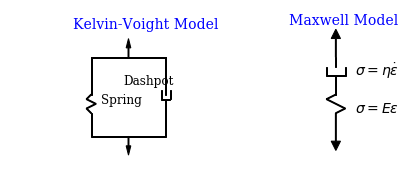

In [8]:
from IPython.display import display
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt

from matplotlib.patches import Arc, Rectangle

#plt.figure()
plt.subplot(1, 2, 1)

plt.axis('image')
ax = plt.gca() 
ax.arrow(-0.04,0.04,0.08,0,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(-0.04,0.04,0,-0.04,head_width=0.0, head_length=0.0, fc='r', ec='k',lw=1,alpha=1)
ax.arrow(0.04,0.04,0,-0.04,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)

# Dashpot
ax.arrow(0.035,-0.005,0.01,0,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(0.035,-0.005,0,0.01,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(0.045,-0.005,0,0.01,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)

ax.arrow(0.04,-0.005,0,-0.04,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)

#spring
ax.arrow(-0.04,0.,-0.005,-0.005,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(-0.045,-0.005,0.01,-0.005,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(-0.035,-0.01,-0.01,-0.005,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(-0.045,-0.015,0.005,-0.005,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)


ax.arrow(-0.04,-0.02,0,-0.025,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(-0.04,-0.045,0.08,0,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)

ax.arrow(0,-0.045,0.0,-0.01,head_width=0.005, head_length=0.01, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(0,0.04,0.0,0.01,head_width=0.005, head_length=0.01, fc='k', ec='k',lw=1,alpha=1)

txtfont = {'family': 'serif','color':  'k','weight': 'normal','size': 12}
plt.text(-0.03,-0.01, 'Spring', fontdict=txtfont)
plt.text(-0.005,0.01, 'Dashpot', fontdict=txtfont)


txtfont = {'family': 'serif','color':  'b','weight': 'normal','size': 14}
plt.text(-0.06,0.07, 'Kelvin-Voight Model', fontdict=txtfont)

ax.set_xlim(-0.07,0.07)
ax.set_ylim(-0.07,0.09)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.axis('image')
ax = plt.gca() 
ax.arrow(0,0.04,0.0,0.02,head_width=0.01, head_length=0.01, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(0,0.04,0,-0.01,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)

#Dashpot
ax.arrow(-0.01,0.02,0.02,0,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(-0.01,0.02,0,0.01,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(0.01,0.02,0,0.01,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)

ax.arrow(0,0.02,0,-0.02,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)

ax.arrow(0,0.,-0.01,-0.005,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(-0.01,-0.005,0.02,-0.01,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(0.01,-0.015,-0.01,-0.005,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=1,alpha=1)

ax.arrow(0,-0.02,0.0,-0.03,head_width=0.01, head_length=0.01, fc='k', ec='k',lw=1,alpha=1)

txtfont = {'family': 'serif','color':  'k','weight': 'normal','size': 14}
plt.text(0.02,0.02, r'$\sigma = \eta \dot{\epsilon}$', fontdict=txtfont)
plt.text(0.02,-0.02, r'$\sigma = E \epsilon$', fontdict=txtfont)


txtfont = {'family': 'serif','color':  'b','weight': 'normal','size': 14}
plt.text(-0.05,0.075, 'Maxwell Model', fontdict=txtfont)

ax.set_xlim(-0.07,0.07)
ax.set_ylim(-0.07,0.09)

plt.axis('off')
plt.tight_layout()

In the Kelvin-Voight model stress and strain are applied with the springand dashpot in parallel.  In this case the strains in the spring and dashpot are the same and the overall applied stress is equal to the sum of the stress in the two:

$\epsilon = \epsilon_{spring} = \epsilon_{dashpot}$

$\sigma = \sigma_{spring} + \sigma_{dashpot} = E\epsilon + \eta \dot{\epsilon}$

In the case of the Maxwell model the opposite is true:  Stresses are equal everywhere and the total strain is the sum of the strains in the two elements,

$\epsilon = \epsilon_{spring} + \epsilon_{dashpot}$

$\sigma = \sigma_{spring} = \sigma_{dashpot}$

Let's follow the Kelvin-Voight model.  Unlike pure linear elasticity (which is indpendent on how fast deformation is imposed) the K-V model predicts that the stress will be higher, the higher the rate of deformation.  Let's imagine a situation where we instantaneously load a 'Kelvin-Voight' material to a fixed level of imposed stress $\sigma$.  In a linear elastic (Hooke's Law) material the strain would instantaneously respond as $\epsilon$ = $\sigma/E$.  However, in the K-V case, the very high strain rate would lead to a very high stress.  Rather, what happens in this case is that the strain builds progressively, with the strain eventually reaching a constant value (meaning $\dot{\epsilon} = 0$) and $\epsilon_{\infty} = \sigma/E$.

Let's re-arrange our equation for the stress, to solve for the rate of change of the strain rate,

$\frac{d\epsilon}{dt} = \dot{\epsilon} =\frac{1}{\eta}\left(\sigma - E\epsilon\right)$

If we bring our (imposed) stress outside of the brackets, we end up with:

$\frac{d\epsilon}{dt}=\frac{\sigma}{\eta}\left(1 - \frac{E}{\sigma}\epsilon\right) = \frac{\sigma}{\eta}\left(1 - \frac{\epsilon}{\epsilon_{\infty}}\right)$

For fixed $\sigma$ and $\epsilon_{\infty} = \sigma/E$ where can re-arrange and integrate to solve for $\epsilon\left(t\right)$.

$\int_{\epsilon_0}^{\epsilon_1}\frac{d\epsilon}{\left(1 - \frac{\epsilon}{\epsilon_{\infty}}\right)} = \int_{t_0}^{t_1}\frac{\sigma}{\eta}dt$

If we take $\epsilon_0$ = 0 and $\epsilon_1$ = $\epsilon$ with correspondingly, $t_0 = 0$ and $t_1$ = $t$ then we can integrate giving,

$\epsilon = 1-\epsilon_\infty\exp{\left(-\frac{\sigma}{\eta}t\right)}$

Try out the prediction of the Kelvin-Voight Model by setting the material properties $E$ and $\eta$ and imposing a stress ($\sigma$) at time is equal to zero. See how the strain develops with time.

Material '1' corresponds to the blue curve in the plot below.  The x and y axes scale with the position of this curve.  Material '2' corresponds to the red curve.  The axes do not scale to keep this curve on the graph.

In [16]:
from IPython.display import display
#import numpy as np
from ipywidgets import *
#import matplotlib.pyplot as plt
from bqplot import *
from bqplot import pyplot as plt
#from matplotlib.patches import Arc, Rectangle
from traitlets import link

def ep(E,eta,sig):
    
    tau = eta/sig
    epinf = sig/E
    t=np.linspace(0,8.*tau,100)
    
    ep = epinf*(1-np.exp(-t/tau))
    return [t,ep]
    
def paramchange(change):
    
    displace=ep(w['E'].value,w['eta'].value,w['sig'].value)
    pltep.x=displace[0]
    pltep.y=displace[1]
    displace2=ep(w2['E2'].value,w2['eta2'].value,w2['sig2'].value)
    pltep2.x=displace2[0]
    pltep2.y=displace2[1]
    
    tau=w['eta'].value/w['sig'].value
    einf=w['sig'].value/w['E'].value
    
    plt.xlim(0,np.max(displace[0]))
    plt.ylim(0,np.max(displace[1]))
    
    
    
w = dict(E = BoundedFloatText(100, min=0.1, max=10000, step=1., description= '$E_1$ (MPa):',layout=Layout(width='99%')), 
         eta = BoundedFloatText(1, min=0, max=1e6, step=1., description='$\eta_1$ (MPa s):',layout=Layout(width='99%')),
         sig = BoundedFloatText(0.1, min=1e-6, max=1e6, step=1., description='$\sigma_1$ (MPa):',layout=Layout(width='99%')))
         
w2 = dict(E2 = BoundedFloatText(100, min=0.1, max=10000, step=1., description='$E_2$ (MPa):',layout=Layout(width='99%')), 
         eta2 = BoundedFloatText(1, min=0, max=1e6, step=1., description='$\eta_2$ (MPa s):',layout=Layout(width='99%')),
         sig2 = BoundedFloatText(0.1, min=1e-6, max=1e6, step=1., description='$\sigma_2$ (MPa):',layout=Layout(width='99%')))
    
output = interactive_output(ep, w)
output2 = interactive_output(ep, w)

fig = plt.figure(figsize=(5, 5),animation_duration=1000)


tau= w['eta'].value/w['sig'].value
einf=w['sig'].value/w['E'].value

t=np.linspace(0,10.*w['eta'].value/w['sig'].value,100)

pltep = plt.plot(ep(w['E'].value,w['eta'].value,w['sig'].value)[0],ep(w['E'].value,w['eta'].value,w['sig'].value)[1]) #,stroke_width=w['h'].value*1e3)
pltep2 = plt.plot(ep(w2['E2'].value,w2['eta2'].value,w2['sig2'].value)[0],ep(w2['E2'].value,w2['eta2'].value,w2['sig2'].value)[1],colors=['red']) #,stroke_width=w2['h2'].value*1e3,colors=['red'])


fig.layout.height = '5in'
fig.layout.width = '8in'
plt.xlim(0,10*tau)
#plt.ylim(0,einf*1.05)
plt.xlabel('time (s)')
plt.ylabel('Strain')

box = VBox([HBox([*w.values()]), HBox([*w2.values()]), HBox([fig])])
#box = VBox([HBox([*w.values()]), fig])*w2.values()])])
#box = HBox([VBox([*w.values()]), fig],border='solid 2px')

display(box)

w['E'].observe(paramchange,'value')
w['eta'].observe(paramchange,'value')
w['sig'].observe(paramchange,'value')


w2['E2'].observe(paramchange,'value')
w2['eta2'].observe(paramchange,'value')
w2['sig2'].observe(paramchange,'value')


